# DECISION TREE
In this notebook we implement some sort of decision tree so that you get the idea behind decision trees


## Imports

***mount drive***

In [ ]:
from google.colab import drive 
drive.mount("/content/drive")

Mounted at /content/drive


***general imports***

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import random 

***tensorflow/keras imports***

In [ ]:
import tensorflow as tf 

***sklearn imports***

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Load Data

***load titanic data***

In [ ]:
titanic = sns.load_dataset("titanic")

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


***building X (feature array)***

In [ ]:
_gender = pd.get_dummies(titanic["sex"])
_class = pd.get_dummies(titanic['class'])

X = pd.concat([_class.First, _class.Second, _gender.female], axis=1)

X

,First,Second,female
0,0,0,0
1,1,0,1
2,0,0,1
3,1,0,1
4,0,0,0
...,...,...,...
886,0,1,0
887,1,0,1
888,0,0,1
889,1,0,0


In [ ]:
y = titanic.survived

y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

## Pre-Processs Data

***split data into train/test sets***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape)
print(y_train.shape)

(596, 3)
(596,)


## Build Model Architecture

In [ ]:
dt_model = DecisionTreeClassifier()

## Fit Model

In [ ]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.5555555555555556, 0.875, 'x[2] <= 0.5\ngini = 0.467\nsamples = 596\nvalue = [374, 222]'),
 Text(0.3333333333333333, 0.625, 'x[0] <= 0.5\ngini = 0.304\nsamples = 390\nvalue = [317, 73]'),
 Text(0.2222222222222222, 0.375, 'x[1] <= 0.5\ngini = 0.263\nsamples = 314\nvalue = [265, 49]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.252\nsamples = 237\nvalue = [202, 35]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.298\nsamples = 77\nvalue = [63, 14]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.432\nsamples = 76\nvalue = [52, 24]'),
 Text(0.7777777777777778, 0.625, 'x[0] <= 0.5\ngini = 0.4\nsamples = 206\nvalue = [57, 149]'),
 Text(0.6666666666666666, 0.375, 'x[1] <= 0.5\ngini = 0.465\nsamples = 147\nvalue = [54, 93]'),
 Text(0.5555555555555556, 0.125, 'gini = 0.498\nsamples = 99\nvalue = [53, 46]'),
 Text(0.7777777777777778, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [1, 47]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.097\nsamples = 59\nvalue = [3, 56]')]

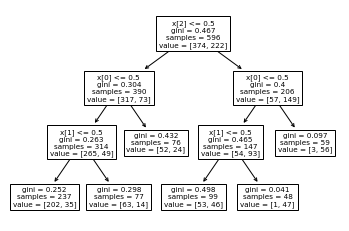

In [ ]:
plot_tree(dt_model) 

## Evaluate Performance

***testing two subjects***

In [ ]:
rose = np.array([[1, 0, 1]]) 
jack = np.array([[0, 0, 0]])

p1 = dt_model.predict_proba(rose)
p2 = dt_model.predict_proba(jack)

print(p1, p2)

[[0.05084746 0.94915254]] [[0.85232068 0.14767932]]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


***final evaluation of the model***

In [ ]:
dt_yhat = dt_model.predict(X_test) 
accuracy_score(y_test, dt_yhat)

0.7728813559322034